# Seattle Bike Share Data Analysis

This data comes from Seattle's Pronto Cycle Share system, which consists of 500 bikes and 54 stations located throughout the city. 

There are 3 datasets that provide data on the stations, trips, and weather from 2014-2016. This analysis focuses on the trips dataset.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
trips = '/Users/alexustian/Downloads/cycle-share-dataset/trip.csv'
#'Skipping line 50793: expected 12 fields, saw 20
df = pd.read_csv(trips, skiprows=[50793])

##Rides Per Month - 2015

In [27]:
Sorted = df.sort_values(['tripduration'], ascending=False)
Sorted.head(5)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
163148,124491,8/7/2015 17:53,8/8/2015 1:53,SEA00420,28794.398,Eastlake Ave E & E Allison St,2nd Ave & Pine St,EL-05,CBD-13,Short-Term Pass Holder,NaN,NaN
231806,197134,4/8/2016 14:25,4/8/2016 22:24,SEA00085,28779.864,3rd Ave & Broad St,15th Ave E & E Thomas St,BT-01,CH-05,Short-Term Pass Holder,NaN,NaN
154789,115593,7/24/2015 17:22,7/25/2015 1:21,SEA00098,28727.481,E Harrison St & Broadway Ave E,E Harrison St & Broadway Ave E,CH-02,CH-02,Short-Term Pass Holder,NaN,NaN
63052,15191,11/19/2014 9:23,11/19/2014 17:21,SEA00401,28690.725,Key Arena / 1st Ave N & Harrison St,Key Arena / 1st Ave N & Harrison St,SLU-19,SLU-19,Short-Term Pass Holder,NaN,NaN
12260,15191,11/19/2014 9:23,11/19/2014 17:21,SEA00401,28690.725,Key Arena / 1st Ave N & Harrison St,Key Arena / 1st Ave N & Harrison St,SLU-19,SLU-19,Short-Term Pass Holder,NaN,NaN


In [28]:
df.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

In [29]:
#Convert starttime and stoptime to datetime format
df['starttime'] =  pd.to_datetime(df['starttime'], format='%m/%d/%Y %H:%M')
df['stoptime'] =  pd.to_datetime(df['stoptime'], format='%m/%d/%Y %H:%M')

In [30]:
#Group trips by month
monthly_trips = df['starttime'].groupby([df.starttime.dt.year, df.starttime.dt.month]).agg('count')

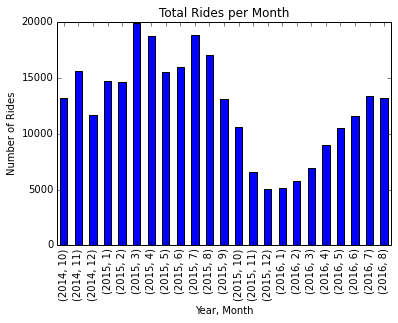

In [31]:
#Graph monthly trips
bar_graph = monthly_trips.plot(kind='bar', title="Total Rides per Month")
bar_graph.set_xlabel("Year, Month")
bar_graph.set_ylabel("Number of Rides")

In [32]:
#Focus on data for a single year, 2015
trips_2015 = df[df.starttime.dt.year == 2015]

In [33]:
#This could also be done as follows
#df[(df.starttime > '2015-01-01')&(df.starttime < '2015-12-31')]

In [34]:
#Group trips by month
monthly_trips_2015 = trips_2015['starttime'].groupby([trips_2015.starttime.dt.year, trips_2015.starttime.dt.month]).agg('count')

In [35]:
#Change the index to month names
monthly_trips_2015.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [36]:
monthly_trips_2015

January      14736
February     14660
March        19960
April        18773
May          15548
June         15999
July         18808
August       17046
September    13134
October      10605
November      6541
December      5049
dtype: int64

(250, 22000)

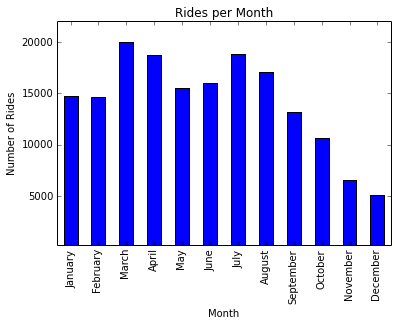

In [42]:
#Graph 2015 rides
graph_2015 = monthly_trips_2015.plot(kind='bar', title="Rides per Month")
graph_2015.set_xlabel("Month")
graph_2015.set_ylabel("Number of Rides")
axes = plt.gca()
axes.set_ylim([250,22000])

##Average Trip Duration per Month - 2015

In [38]:
#Find the average trip duration (in seconds) per month
average_duration_2015 = trips_2015['tripduration'].groupby([trips_2015.starttime.dt.month]).mean()

In [39]:
#Change the indext to month names
average_duration_2015.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [40]:
average_duration_2015

January       885.015497
February     1118.058120
March        1173.901884
April        1216.011314
May          1334.619687
June         1326.595510
July         1335.337431
August       1299.487447
September    1192.563013
October       939.844421
November      808.775577
December      727.692705
Name: tripduration, dtype: float64

(200, 1600)

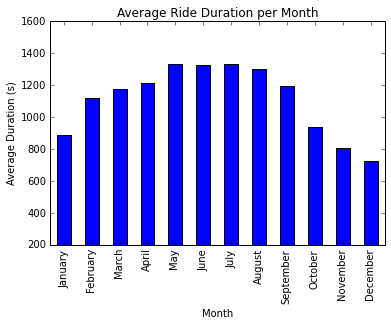

In [41]:
#Graph the average trip durations per month for 2015
duration_graph = average_duration_2015.plot(kind='bar', title="Average Ride Duration per Month")
duration_graph.set_xlabel("Month")
duration_graph.set_ylabel("Average Duration (s)")
axes = plt.gca()
axes.set_ylim([200,1600])